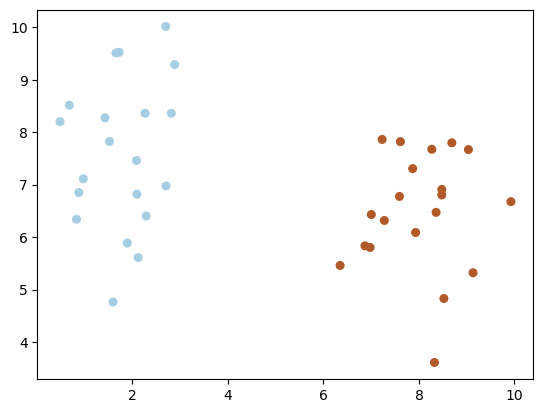

In [8]:

import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.datasets import make_blobs #make_blobs: A function to generate synthetic datasets for clustering or classification tasks.

# we create 40 separable points
'''
Generates n_samples=40 data points.
Creates two clusters (centers=2) that are linearly separable
Output:
X: A 2D NumPy array containing the feature values of the data points (40 rows, 2 columns).
y: A 1D NumPy array containing the labels (either 0 or 1) for each data point.

'''
X, y = make_blobs(n_samples=40, centers=2, random_state=20) 
# fit the model, don't regularize for illustration purposes 
'''
svm.SVC: Initializes a Support Vector Classifier.
kernel='linear': Specifies a linear kernel, which means the decision boundary will be a straight line.
C=1: The regularization parameter, controlling the trade-off between maximizing the margin and minimizing classification error. 
A low value of C allows for more margin violations,
whereas a high value forces the model to classify all points correctly (less regularization).
'''
clf = svm.SVC (kernel = 'linear', C=1)
clf.fit(X, y)
# display the data in graph form
'''
c=y: Colors each point based on its label (0 or 1).
s=30: Sets the size of the points.
cmap=plt.cm.Paired: Specifies a colormap to visually distinguish points of different class
'''
plt.scatter (X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
plt.show()

In [7]:

# Using to predict unknown data
newData =[[3,4],[5,6]]
print(clf.predict(newData))

[0 1]


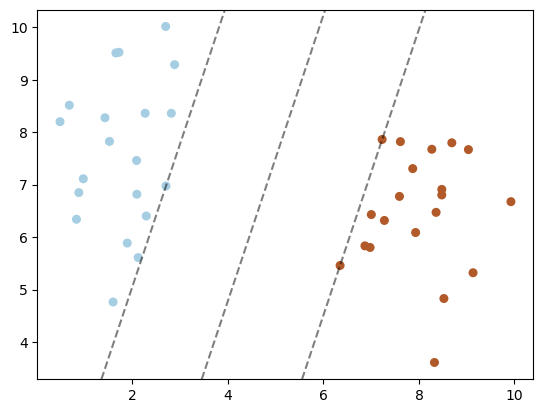

In [11]:

# fit the model, don't regularize for illustrati
clf = svm.SVC (kernel = 'linear', C=1000)
clf.fit(X, y)
plt.scatter (X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca() #plt.gca(): Gets the current axis object for the plot.
#Retrieves the x-axis and y-axis limits, which will define the range of the decision boundary and margin visualization.
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model XX
#np.linspace(start, stop, num):Creates 30 equally spaced points between the x-axis limits (xlim) and y-axis limits (ylim)
xx = np.linspace (xlim[0], xlim[1], 30)
yy = np.linspace (ylim[0], ylim[1], 30)
'''
np.meshgrid:
Creates a grid of points by combining xx (x-coordinates) and yy (y-coordinates).
YY and XX: Represent the y-coordinates and x-coordinates of the grid points, respectively.
'''
YY, XX = np.meshgrid (yy, xx)
'''
XX.ravel() and YY.ravel(): Flattens the grid arrays XX and YY into 1D arrays.
np.vstack([...]).T: Stacks these flattened arrays vertically into a 2D array where each row is a pair of coordinates (x, y) 
representing a point on the grid. The .T transposes the result so each row is a point.
'''
xy = np.vstack ([XX.ravel(), YY.ravel()]).T

'''
clf.decision_function(xy): 
Computes the decision function for each point in the grid xy. 
The decision function tells you how far each point is from the decision boundary.
reshape(XX.shape): 
Reshapes the 1D array of decision function values back into the shape of the grid XX to be compatible with plottin
'''
Z = clf.decision_function (xy).reshape(XX. shape)

# plot decision boundary and margins 
'''
ax.contour(...): Creates contour lines at specific levels on the grid.
XX, YY, Z: Defines the grid (XX, YY) and the corresponding decision function values (Z).
levels=[-1, 0, 1]: Specifies the contour levels. The decision function equals:
0 at the decision boundary,
1 for the positive margin (where the SVM classifies as class 1),
-1 for the negative margin (where the SVM classifies as class 0).
colors='k': Sets the color of the contours to black ('k').
alpha=0.5: Sets the transparency of the contours to 50%.
linestyles=['--', '--', '--']: Specifies dashed lines for all contours.
'''
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],alpha=0.5,linestyles=['--','--','--'])
# plot support vectors

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()